# <center><span style='color:Green'>Telecom Churn - Case Study</span></center>

# <span style='color:Blue'>1. Introduction</span>

## 1.1 Problem Statement

- In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. 
- It is very important for any telecom operator to prevent the present customers from churning to other operators.
- In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.
- Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition to reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 

## 1.2 Objective

Create a model to forecast whether or not a high-value customer would churn in the near future (churn phase). Identifying key predictors of churn allows companies to take action, such as offering special programs or recharge discounts. These indicators may also reveal why customers switch to other networks.
Based on your observations, make recommendations for customer churn management strategies.
To manage a high number of attributes, use a dimensionality reduction technique such as PCA, and then design a prediction model.del

## 1.3 Approach to solving this Business Problem

- Step 1 : Introduction
- Step 2 : Data Understanding
- Step 3 : Data Preparation
- Step 4 : Exploratory data analysis (EDA)
- Step 5 : Training the model
- Step 6 : Model Prediction and Evaluation
- Step 7 : Recommandations

# <span style='color:Blue'>2. Data Understanding </span>

In [383]:
# Importing libraies and packages

import pandas as pd #Data Processing
import numpy as np #Linear Algebra
import seaborn as sns #Data Visualization
import matplotlib.pyplot as plt #Data Visualization
import warnings #Warnings
warnings.filterwarnings ("ignore") #Warnings
from IPython.display import Markdown, display ,HTML
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 2.1 - Data Loading : Train Data Set

In [27]:
df_tel_train = pd.read_csv("train.csv")
df_tel_train.head() 

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [29]:
df_tel_train.shape

(69999, 172)

In [31]:
df_tel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [33]:
df_tel_train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


## 2.2 - Data Loading : Test Data Set

In [36]:
df_tel_test = pd.read_csv("test.csv")
df_tel_test.head() 

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [40]:
df_tel_test.shape

(30000, 171)

In [46]:
df_tel_test.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.0,29684.0,29684.0,29684.0,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,...,30000.000000,30000.000000,30000.000000,7585.000000,7706.000000,7922.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,84998.500000,109.0,0.0,0.0,0.0,282.644348,279.355021,279.845167,130.629693,133.148632,...,0.073467,0.077967,0.082200,0.909954,0.906956,0.891946,1218.023200,68.314097,68.946576,59.891621
std,8660.398374,0.0,0.0,0.0,0.0,314.560212,323.205370,326.437029,290.677420,302.921820,...,0.557327,0.613596,0.611546,0.286267,0.290513,0.310468,960.109844,263.460641,278.749349,246.098292
min,69999.000000,109.0,0.0,0.0,0.0,-185.043000,-2014.045000,-146.859000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000
25%,77498.750000,109.0,0.0,0.0,0.0,92.907500,87.504750,84.180500,7.280000,6.660000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,466.000000,0.000000,0.000000,0.000000
50%,84998.500000,109.0,0.0,0.0,0.0,198.227500,191.775000,191.690500,34.760000,32.550000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,853.000000,0.000000,0.000000,0.000000
75%,92498.250000,109.0,0.0,0.0,0.0,371.969250,365.250750,367.804750,117.170000,115.210000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1795.000000,0.000000,0.000000,0.000000
max,99998.000000,109.0,0.0,0.0,0.0,10955.066000,13224.119000,13505.996000,6944.360000,7411.010000,...,28.000000,35.000000,30.000000,1.000000,1.000000,1.000000,4197.000000,6054.390000,7994.840000,6614.530000


# <span style='color:Blue'>3. Data Preparation </span>

### 3.1 - Checking and droping duplicates

In [78]:
if (duplicated := df_tel_train.duplicated(keep=False)).any():
    some_duplicates = df_tel_train[duplicated].sort_values(by=df_tel_train.columns.to_list()).head()
    print(f"Dataset has one or more duplicated rows, for example:\n{some_duplicates}")
else:
    print(f"Dataset has 0 duplicates")

Dataset has 0 duplicates


In [82]:
df_tel_train.isna().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [86]:
round((df_tel_train.isna().sum()/len(df_tel_train.index))*100,2)

id                   0.0
circle_id            0.0
loc_og_t2o_mou       1.0
std_og_t2o_mou       1.0
loc_ic_t2o_mou       1.0
                    ... 
aon                  0.0
aug_vbc_3g           0.0
jul_vbc_3g           0.0
jun_vbc_3g           0.0
churn_probability    0.0
Length: 172, dtype: float64

### 3.2 - Dropping irrelevant or unnecessary columns

#### There are missing values in several columns, and they are usually either very high (over 70%) or low (up to about 5%). All columns with a significant percentage of missing values will be eliminated (using a 70% threshold).

In [91]:
col_Null_70=[]
for col in df_tel_train.columns:
    if round((df_tel_train[col].isna().sum()/len(df_tel_train.index))*100,2) >=70:
        col_Null_70.append(col)

In [93]:
print("Number of columns with high missing values = ",len(col_Null_70))
print("\n List of columns to drop ->\n")
print(col_Null_70)

Number of columns with high missing values =  24

 List of columns to drop ->

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [95]:
## Droping the colums

df_tel_train= df_tel_train.drop(df_tel_train[col_Null_70], axis=1)

In [97]:
# Id type columns 
df_tel_train = df_tel_train.drop(['id','circle_id'],axis=1)

# Columns containing last date of months
df_tel_train = df_tel_train.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)

# Columns which have only one value like zeros for all rows 
df_tel_train = df_tel_train.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1)
df_tel_train = df_tel_train.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8'],axis=1)
df_tel_train = df_tel_train.drop(['std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)

# We already have monthly reacharge counts and amounts so their dates aren't useful
df_tel_train = df_tel_train.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1)

In [99]:
df_tel_train.shape

(69999, 131)

### 3.3 - Missing Value Treatment

In [106]:
col_missing_values = df_tel_train.columns[df_tel_train.isna().any()]

# Calculate the count of missing values in each column
missing_values_count = df_tel_train[col_missing_values].isna().sum()

# Missing value percentage in each column
round(df_tel_train.isnull().sum()/len(df_tel_train),3)*100

arpu_6               0.0
arpu_7               0.0
arpu_8               0.0
onnet_mou_6          4.0
onnet_mou_7          3.8
                    ... 
aon                  0.0
aug_vbc_3g           0.0
jul_vbc_3g           0.0
jun_vbc_3g           0.0
churn_probability    0.0
Length: 131, dtype: float64

In [115]:
null_col=[]
for col in df_tel_train.columns:
    if round((df_tel_train[col].isna().sum()/len(df_tel_train.index))*100,2) >0:
        null_col.append(col)
print("Number of columns with low but non-zero missing values = ",len(null_col))
print("\n List of columns to treat ->\n")
print(null_col)

Number of columns with low but non-zero missing values =  81

 List of columns to treat ->

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou

#### The majority of null columns appear to be numeric and set to 0. Hence, replacing null values as 0.

In [117]:
set_missing = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
df_tel_train[null_col] = set_missing.fit_transform(df_tel_train[null_col])

In [122]:
# Final Check
df_tel_train.isnull().sum().sum()

0

In [124]:
df_tel_train.shape

(69999, 131)

### 3.4 - Extracting list of columns containing recharge amount

In [50]:
recharge_columns =  df_tel_train.columns[df_tel_train.columns.str.contains('rech_amt|rech_data')]
print(recharge_columns,"\n")
print("The are in total",len(recharge_columns),"Columns containing Recharge Amount")

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8'],
      dtype='object') 

The are in total 18 Columns containing Recharge Amount


In [141]:
#Replacing the NAN values with 0, considering there were no recharges done by the customer.
df_tel_train['total_rech_data_6'] = df_tel_train['total_rech_data_6'].replace(np.NaN,0.0)
df_tel_train['total_rech_data_7'] = df_tel_train['total_rech_data_7'].replace(np.NaN,0.0)
df_tel_train['total_rech_data_8'] = df_tel_train['total_rech_data_8'].replace(np.NaN,0.0)
df_tel_train['av_rech_amt_data_6'] = df_tel_train['av_rech_amt_data_6'].replace(np.NaN,0.0)
df_tel_train['av_rech_amt_data_7'] = df_tel_train['av_rech_amt_data_7'].replace(np.NaN,0.0)
df_tel_train['av_rech_amt_data_8'] = df_tel_train['av_rech_amt_data_8'].replace(np.NaN,0.0)

### Adding a new column to get the total recharge amount so we can calculate the high value customer.

In [143]:
df_tel_train['total_rech_6'] = df_tel_train.total_rech_data_6 + df_tel_train.av_rech_amt_data_6
df_tel_train['total_rech_7'] = df_tel_train.total_rech_data_7 + df_tel_train.av_rech_amt_data_7
df_tel_train['total_rech_8'] = df_tel_train.total_rech_data_8 + df_tel_train.av_rech_amt_data_8

 We are assuming that there are three phases of customer lifecycle :
- The ‘good’ phase [Month 6 & 7]
- The ‘action’ phase [Month 8]
- The ‘churn’ phase [Month 9]

In this case, we are working over a four-month window, the first two months are the **good** phase, the third month is the **action** phase, while the fourth month is the **churn** phase.

In [152]:
#Defining total average recharge amount for good phase for months 6 and 7 (the good phase)
df_tel_train['total_avg_rech_amnt_6_7_GPhase'] = (df_tel_train.total_rech_amt_6 + df_tel_train.total_rech_6+ df_tel_train.total_rech_amt_7+ df_tel_train.total_rech_7)/2

### 3.4 - Filtering high valued customers 

In [154]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase 

high_value_filter = df_tel_train.total_avg_rech_amnt_6_7_GPhase.quantile(0.7)
print('70 percentile of 6th and 7th months avg recharge amount: '+str(high_value_filter),"\n")

telecom_df_high_val_cust = df_tel_train[df_tel_train.total_avg_rech_amnt_6_7_GPhase > high_value_filter]
print('Dataframe Shape after Filtering High Value Customers: ' + str(telecom_df_high_val_cust.shape),"\n")

70 percentile of 6th and 7th months avg recharge amount: 26.0 

Dataframe Shape after Filtering High Value Customers: (20599, 135) 



### 3.5 - Tag churners and remove attributes of the churn phase

- Now tagging the churned customers (churn = 1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 
- The attributes we need to use to tag churners are:
    - total_ic_mou_8
    - total_og_mou_8
    - vol_2g_mb_8
    - vol_3g_mb_8
- After tagging churners, we will remove all the attributes corresponding to the churn phase (all attributes having ‘ _8’, etc. in their names).

In [159]:
#taking all the mentioned columns in a dataframe
high_val_cust_8 = ['total_ic_mou_8', 'total_og_mou_8', 'vol_2g_mb_8','vol_3g_mb_8']

In [161]:
# Checking the NA/Null values are present or Not
df = 100*telecom_df_high_val_cust.loc[:,high_val_cust_8].isnull().sum()/len(telecom_df_high_val_cust)
df

total_ic_mou_8    0.0
total_og_mou_8    0.0
vol_2g_mb_8       0.0
vol_3g_mb_8       0.0
dtype: float64

In [163]:
# Initially set all the values as 0
telecom_df_high_val_cust['churn']= 0

In [165]:
#is_churned boolean flag for customers where above values are zero
is_churned = (telecom_df_high_val_cust.total_ic_mou_8 == 0) & \
             (telecom_df_high_val_cust.total_og_mou_8 == 0) & \
             (telecom_df_high_val_cust.vol_2g_mb_8 ==0) & \
             (telecom_df_high_val_cust.vol_3g_mb_8 ==0)
# set all which having is_churned True condition as 1
telecom_df_high_val_cust.loc[is_churned,'churn']=1

In [167]:
# let us check what's the % of churned customers
print("The Percentage of Churned Customers are",round(100*telecom_df_high_val_cust.churn.sum()/len(telecom_df_high_val_cust),2),"%")

The Percentage of Churned Customers are 5.66 %


In [169]:
telecom_df_high_val_cust

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_6,total_rech_7,total_rech_8,total_avg_rech_amnt_6_7_GPhase,churn
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,710,0.00,0.00,0.00,0,0.0,146.0,0.0,146.0,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,647,0.00,0.00,0.00,0,182.0,198.0,148.0,380.0,0
7,167.861,167.869,167.866,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,584,82.26,73.56,177.14,0,199.0,199.0,199.0,398.0,0
10,445.826,18.310,24.690,16.54,0.00,0.00,104.81,8.16,2.36,18.56,...,468,1.05,0.00,18.95,0,99.0,0.0,0.0,99.0,0
15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,...,602,0.00,0.00,0.00,0,155.0,0.0,155.0,155.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69989,196.695,298.645,192.440,1.05,0.00,5.83,44.74,32.16,30.93,0.00,...,251,107.77,112.70,242.18,0,101.0,234.0,92.0,335.0,0
69993,235.524,195.633,129.598,45.08,94.31,8.34,111.51,236.61,91.54,0.00,...,1507,0.00,16.53,18.84,0,328.0,44.0,0.0,372.0,0
69994,15.760,410.924,329.136,0.00,7.36,10.93,0.00,488.46,381.64,14.96,...,221,0.00,0.00,0.00,0,0.0,142.0,18.0,142.0,0
69997,238.575,245.414,145.062,14.01,7.64,6.71,30.34,16.68,12.56,25.06,...,277,664.25,1402.96,990.97,0,180.0,253.0,146.0,433.0,0


# <span style='color:Blue'>4. Exploratory data analysis </span>

In [235]:
# create box plot function for  6th, 7th and 8th month variables
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecom_df_high_val_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

### 4.1 - Chrun Probability

In [173]:
df_tel_train['churn_probability'].value_counts()

churn_probability
0    62867
1     7132
Name: count, dtype: int64

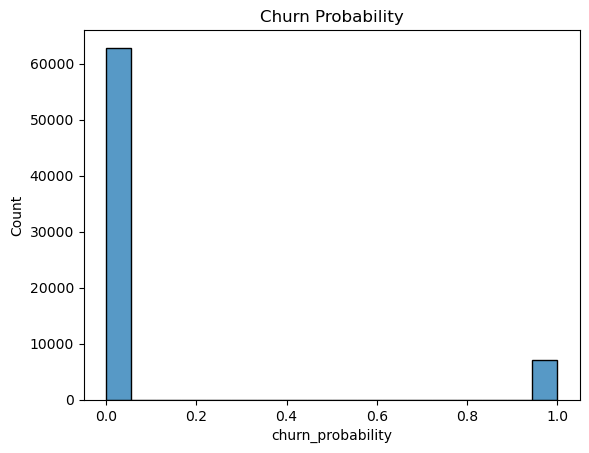

In [177]:
#Distribution for the churn probability
sns.histplot(df_tel_train['churn_probability'])
plt.title("Churn Probability")
plt.show()

In [179]:
round(((7132)/62867)*100,2)

11.34

#### The churn rate is 11.34%. The target variable is not very well balanced so we will have to see how well the various classification models perform on this dataset. Given the imbalance, boosting models may perform better when it comes to precision and recall.

## 4.2 - Recharge amount related Features

In [253]:
#Lets extract the columns containing recharge amount in their variable name
recharge_amnt_columns =  telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

### 4.2.1 Box Plot - total_rech_amt

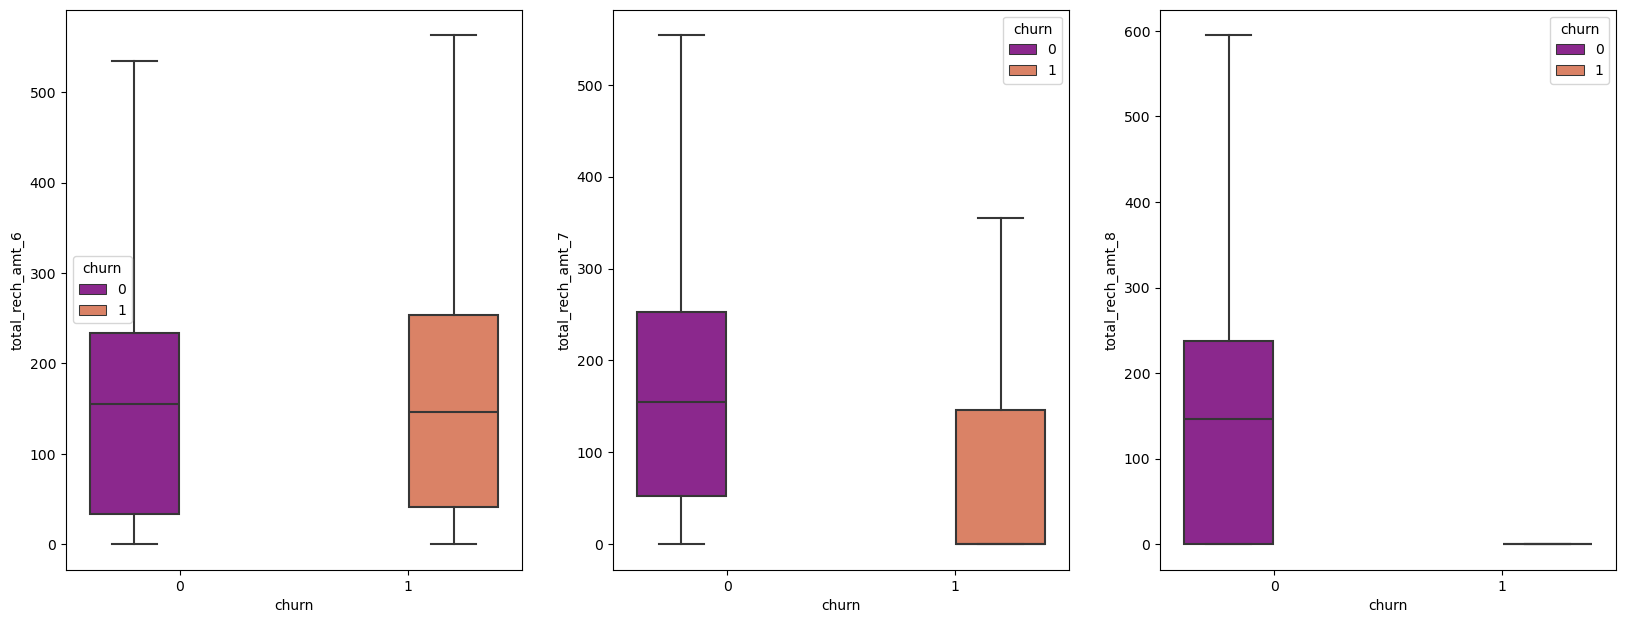

In [255]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

#### Observations : We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase).

## 4.2.2 Box Plot - total_rech

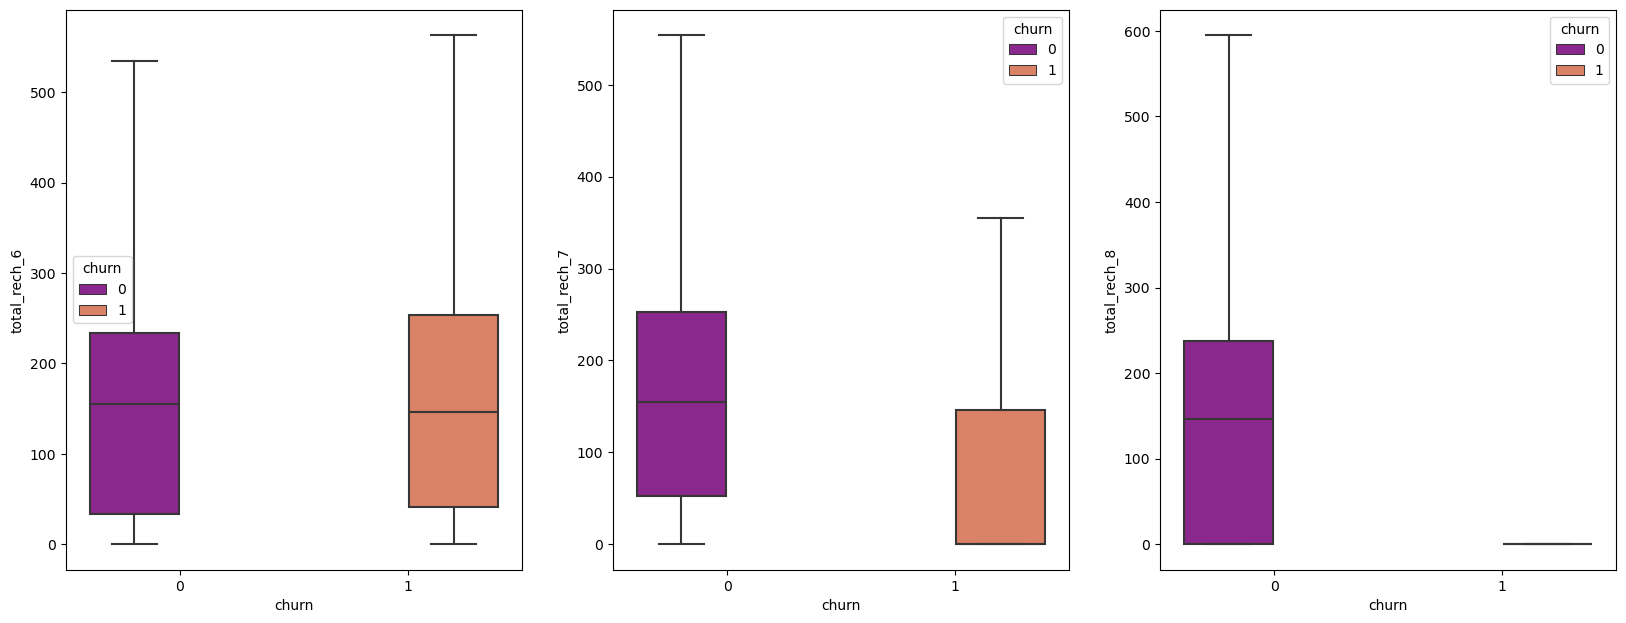

In [268]:
# Ploting for total recharge amount for data:
plot_box_chart('total_rech')

### 4.2.3 Box Plot - max_rech_amt

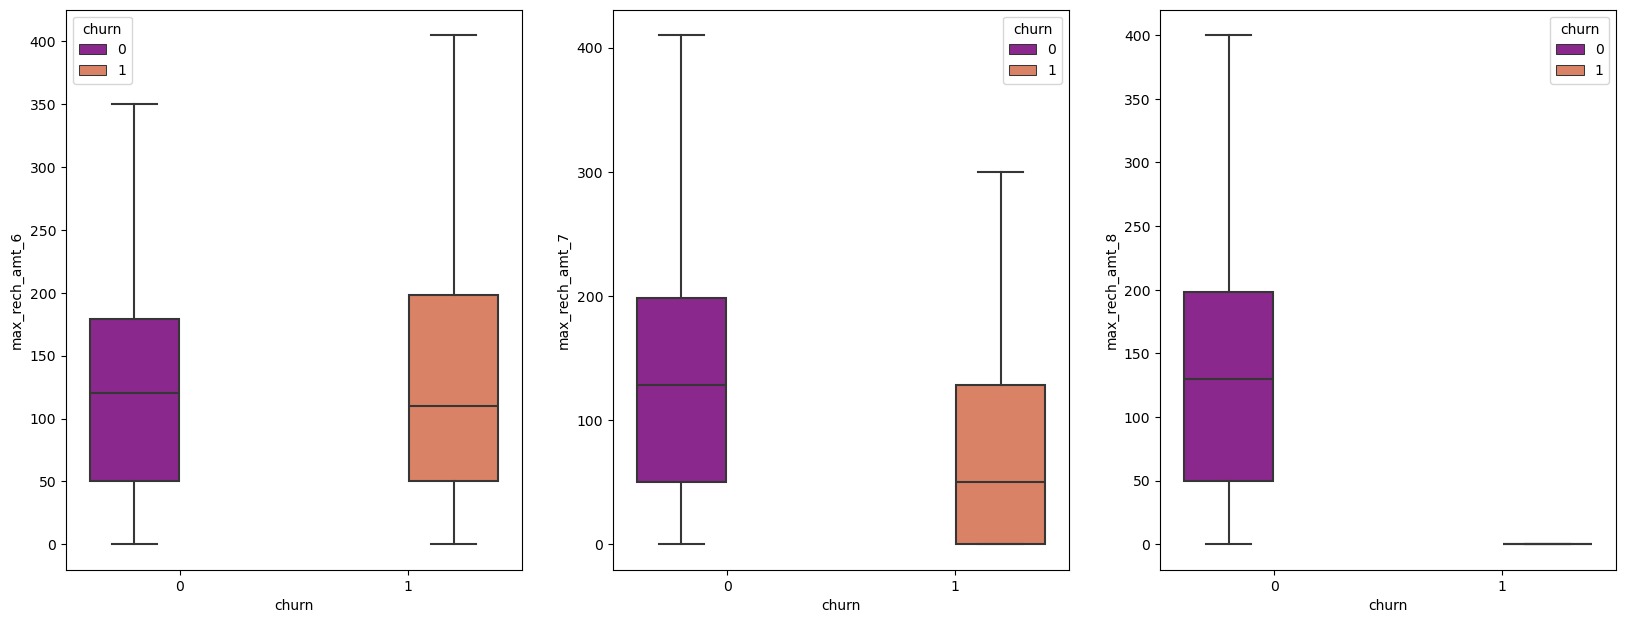

In [273]:
# Ploting for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

#### Observations : We can see that there is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.

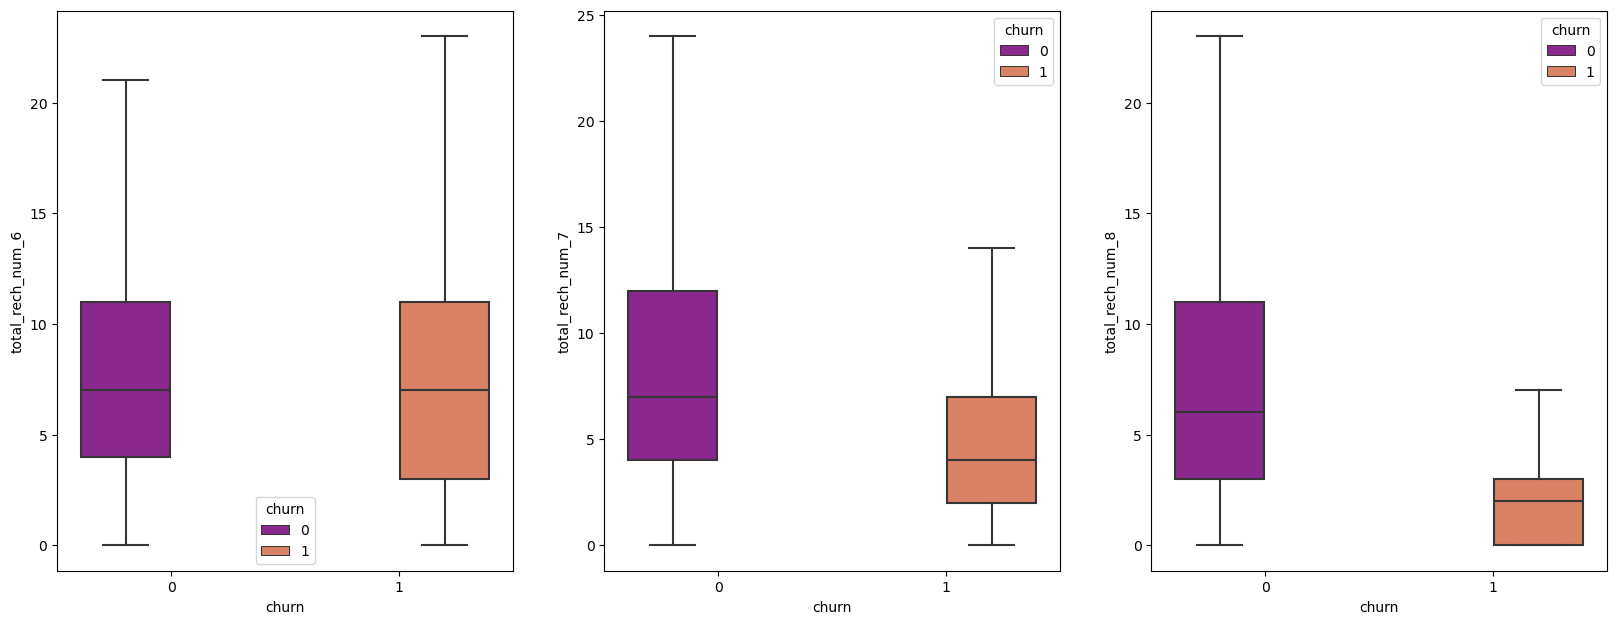

In [280]:
#Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')

#### Observations : We can see that there is a huge drop in total recharge number also in the 8th month (action phase) for churned customers.

## 4.3 - 2G and 3G usage related Features

In [285]:
usage_2g_and_3g = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('2g|3g',regex=True)]

### 4.3.1 Box Plot - vol_2g_mb

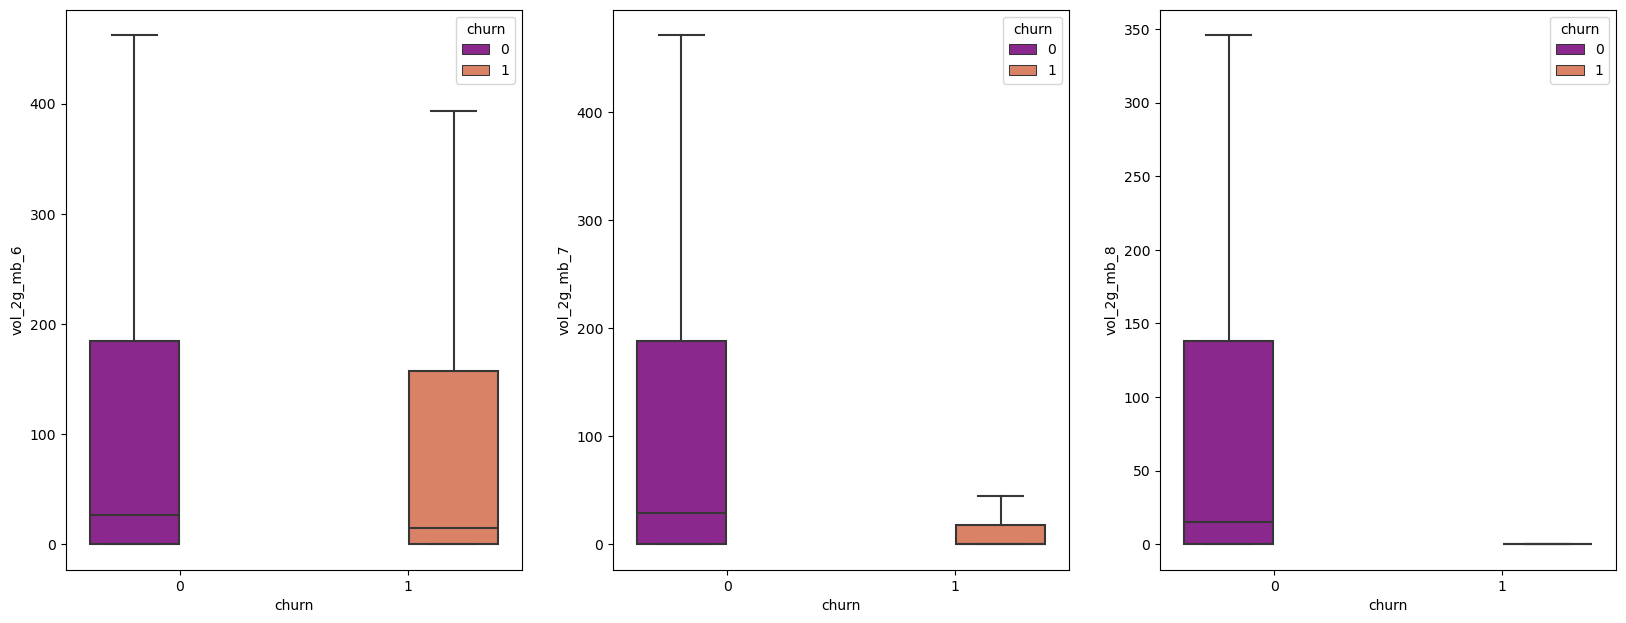

In [287]:
# Ploting for volume of 2G and 3G usage columns:
plot_box_chart('vol_2g_mb')

### 4.3.3 Box Plot - vol_3g_mb

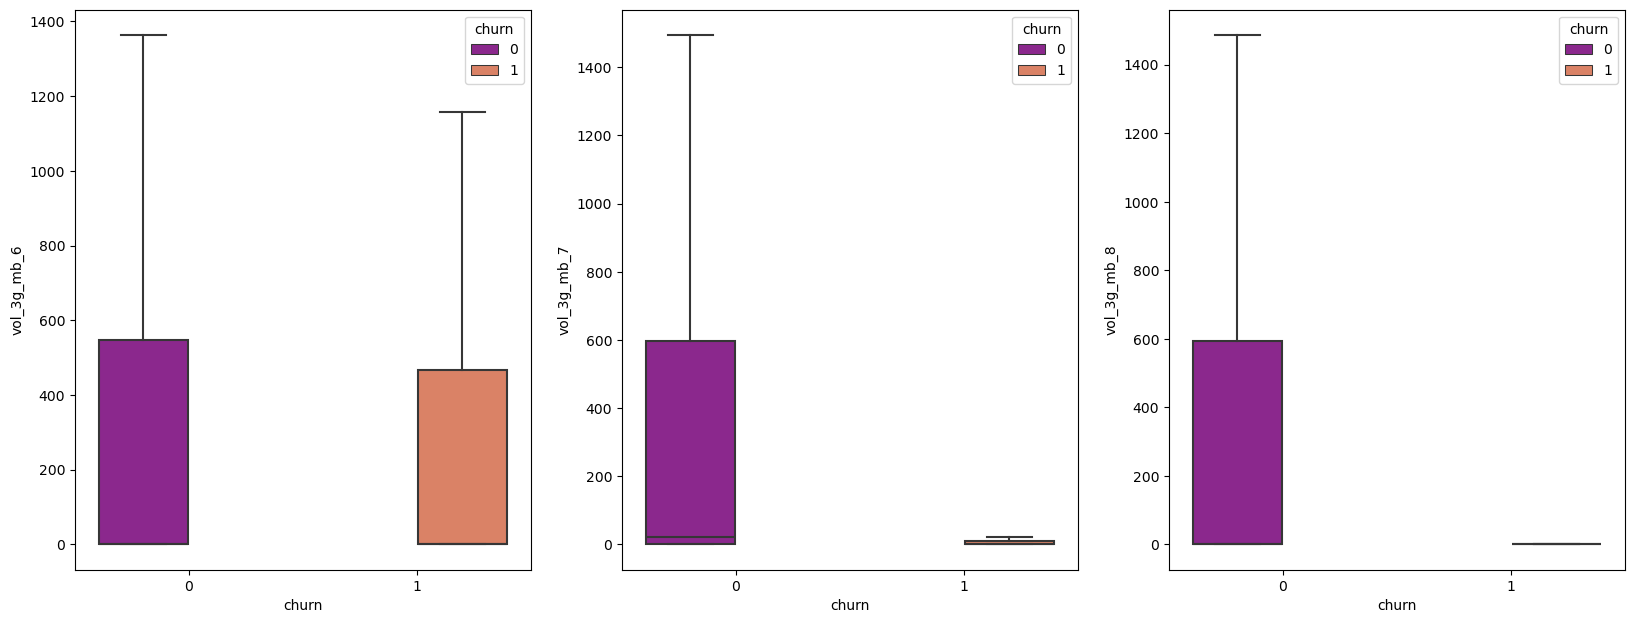

In [292]:
plot_box_chart('vol_3g_mb')

##### Observations : We have two observations from above:
- 2G and 3G usage for churned customers drops in 8th month
- We also see that 2G/3G usage is higher for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available.

In [295]:
# let's check monthly 2G/3G service schemes
monthly_subcription_2g_3g = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

In [298]:
#Checking Null value
100*telecom_df_high_val_cust.loc[:,monthly_subcription_2g_3g].isnull().sum()/len(telecom_df_high_val_cust.loc[:,monthly_subcription_2g_3g])

monthly_2g_6    0.0
monthly_2g_7    0.0
monthly_2g_8    0.0
monthly_3g_6    0.0
monthly_3g_7    0.0
monthly_3g_8    0.0
dtype: float64

In [306]:
telecom_df_high_val_cust[monthly_subcription_2g_3g].info()

<class 'pandas.core.frame.DataFrame'>
Index: 20599 entries, 1 to 69998
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   monthly_2g_6  20599 non-null  int64
 1   monthly_2g_7  20599 non-null  int64
 2   monthly_2g_8  20599 non-null  int64
 3   monthly_3g_6  20599 non-null  int64
 4   monthly_3g_7  20599 non-null  int64
 5   monthly_3g_8  20599 non-null  int64
dtypes: int64(6)
memory usage: 1.6 MB


In [310]:
#Plotting Bar Chart
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index=['Non Churn'])
    mean_df_1 = pd.DataFrame([df_1.mean()],index=['Churn'])

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

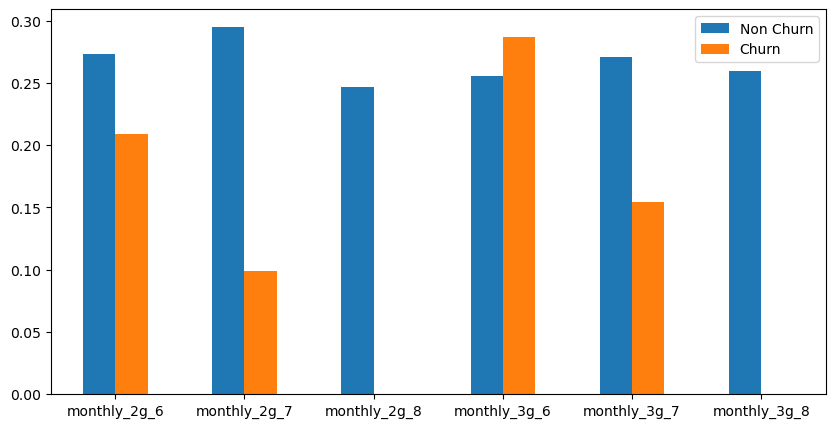

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.273078,0.294484,0.246733,0.255892,0.270711,0.259648
Churn,0.208584,0.098712,0.000000,0.286695,0.154506,0.000000


In [312]:
#Plotting monthly 2g and 3g
plot_mean_bar_chart(telecom_df_high_val_cust, monthly_subcription_2g_3g)

#### Observations : Again we can see a drop in monthly subscription for churned customers in 8th Month.

### Data Preparation For Model Building

In [358]:
#Display all the information about the Dataset
df_tel_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 135 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    arpu_6                          float64
 1    arpu_7                          float64
 2    arpu_8                          float64
 3    onnet_mou_6                     float64
 4    onnet_mou_7                     float64
 5    onnet_mou_8                     float64
 6    offnet_mou_6                    float64
 7    offnet_mou_7                    float64
 8    offnet_mou_8                    float64
 9    roam_ic_mou_6                   float64
 10   roam_ic_mou_7                   float64
 11   roam_ic_mou_8                   float64
 12   roam_og_mou_6                   float64
 13   roam_og_mou_7                   float64
 14   roam_og_mou_8                   float64
 15   loc_og_t2t_mou_6                float64
 16   loc_og_t2t_mou_7                float64
 17   loc_og_t2t

In [366]:
# Train-test split
df_train, df_test = train_test_split(df_tel_train,train_size=0.70,test_size=0.30,random_state=42)


In [368]:
# Dividing into X and y sets for model building
y_train = df_train.pop('churn_probability')
X_train = df_train
y_test = df_test.pop('churn_probability')
X_test = df_test

In [370]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_6,total_rech_7,total_rech_8,total_avg_rech_amnt_6_7_GPhase
61787,373.161,468.636,679.900,60.03,98.26,62.64,658.93,970.49,1197.26,0.00,...,0,0,472,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19961,81.812,88.382,55.468,0.00,0.00,0.00,0.00,0.28,0.46,0.00,...,0,0,577,0.0,0.0,0.0,105.0,208.0,119.0,313.0
11040,366.437,264.586,247.665,47.66,34.06,115.89,203.21,299.94,273.94,90.58,...,0,0,3145,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27673,328.054,53.221,42.170,368.18,43.73,10.70,173.51,19.64,0.00,0.00,...,0,0,551,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22876,59.990,66.337,75.979,8.59,31.08,34.46,48.76,34.78,75.64,0.00,...,0,0,524,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [372]:
y_train.head()

61787    0
19961    0
11040    0
27673    0
22876    0
Name: churn_probability, dtype: int64

In [376]:
print(df_tel_train.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(69999, 135)
(48999, 134)
(21000, 134)
(48999,)
(21000,)


### Scaling - using Standard scaler

In [385]:
scaler = StandardScaler()

In [387]:
# Scaling the train & test datasets
varlist = X_train.columns
X_train[varlist] = scaler.fit_transform(X_train[varlist])
X_test[varlist] = scaler.transform(X_test[varlist])

In [389]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_6,total_rech_7,total_rech_8,total_avg_rech_amnt_6_7_GPhase
61787,0.276037,0.599874,1.210616,-0.230858,-0.101709,-0.207085,1.483483,2.439311,3.199007,-0.173188,...,-0.12482,-0.125845,-0.786384,-0.252568,-0.248643,-0.236722,-0.382834,-0.391133,-0.400074,-0.424500
19961,-0.624046,-0.600078,-0.672568,-0.433732,-0.419905,-0.409853,-0.606555,-0.593596,-0.586563,-0.173188,...,-0.12482,-0.125845,-0.675875,-0.252568,-0.248643,-0.236722,0.436626,1.182425,0.510531,0.894223
11040,0.255264,-0.044039,-0.092934,-0.272663,-0.309608,-0.034714,0.038000,0.343151,0.278475,1.488076,...,-0.12482,-0.125845,2.026842,-0.252568,-0.248643,-0.236722,-0.382834,-0.391133,-0.400074,-0.424500
27673,0.136685,-0.711034,-0.712673,0.810545,-0.278294,-0.375216,-0.056205,-0.533076,-0.588018,-0.173188,...,-0.12482,-0.125845,-0.703239,-0.252568,-0.248643,-0.236722,-0.382834,-0.391133,-0.400074,-0.424500
22876,-0.691462,-0.669645,-0.610711,-0.404701,-0.319258,-0.298305,-0.451895,-0.485748,-0.348762,-0.173188,...,-0.12482,-0.125845,-0.731656,-0.252568,-0.248643,-0.236722,-0.382834,-0.391133,-0.400074,-0.424500
